## HR ATTRITION ANALYSIS

## Exploratory Data Analysis of HR Attrition Data 

## Objectives

. To establish relationship between monthly income, Job satisfaction and years spent in the company

. To visualise existing relationship of the data presented 

. To identify staff performance over time 

. To identify the relationship between work life balance and staff turnover

In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
import bokeh as bk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

In [80]:
df = pd.read_csv(r"C:\Users\Bamy\Downloads\hr\HR-Employee-Attrition.csv")

In [81]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Data validation

In [82]:
df.shape

(1470, 35)

In [83]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [84]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Ascertaining relationship between job satisfaction and turnover rate

In [85]:
model_ = df.filter(items= ["YearsAtCompany", "EmployeeNumber", "WorkLifeBalance", "RelationshipSatisfaction", "JobInvolvement",  "JobSatisfaction", "YearsInCurrentRole", "PerformanceRating", "PercentSalaryHike", "MonthlyIncome"])

model_

,YearsAtCompany,EmployeeNumber,WorkLifeBalance,RelationshipSatisfaction,JobInvolvement,JobSatisfaction,YearsInCurrentRole,PerformanceRating,PercentSalaryHike,MonthlyIncome
0,6,1,1,1,3,4,4,3,11,5993
1,10,2,3,4,2,2,7,4,23,5130
2,0,4,3,2,2,3,0,3,15,2090
3,8,5,3,3,3,3,7,3,11,2909
4,2,7,3,4,3,2,2,3,12,3468
...,...,...,...,...,...,...,...,...,...,...
1465,5,2061,3,3,4,4,2,3,17,2571
1466,7,2062,3,1,2,1,7,3,15,9991
1467,6,2064,3,2,4,2,2,4,20,6142
1468,9,2065,2,4,2,2,6,3,14,5390


In [86]:
correlation = model_.corr()
print(correlation)

                          YearsAtCompany  EmployeeNumber  WorkLifeBalance  \
YearsAtCompany                  1.000000       -0.011240         0.012089   
EmployeeNumber                 -0.011240        1.000000         0.010309   
WorkLifeBalance                 0.012089        0.010309         1.000000   
RelationshipSatisfaction        0.019367       -0.069861         0.019604   
JobInvolvement                 -0.021355       -0.006888        -0.014617   
JobSatisfaction                -0.003803       -0.046247        -0.019459   
YearsInCurrentRole              0.758754       -0.008416         0.049856   
PerformanceRating               0.003435       -0.020359         0.002572   
PercentSalaryHike              -0.035991       -0.012944        -0.003280   
MonthlyIncome                   0.514285       -0.014829         0.030683   

                          RelationshipSatisfaction  JobInvolvement  \
YearsAtCompany                            0.019367       -0.021355   
EmployeeNumb

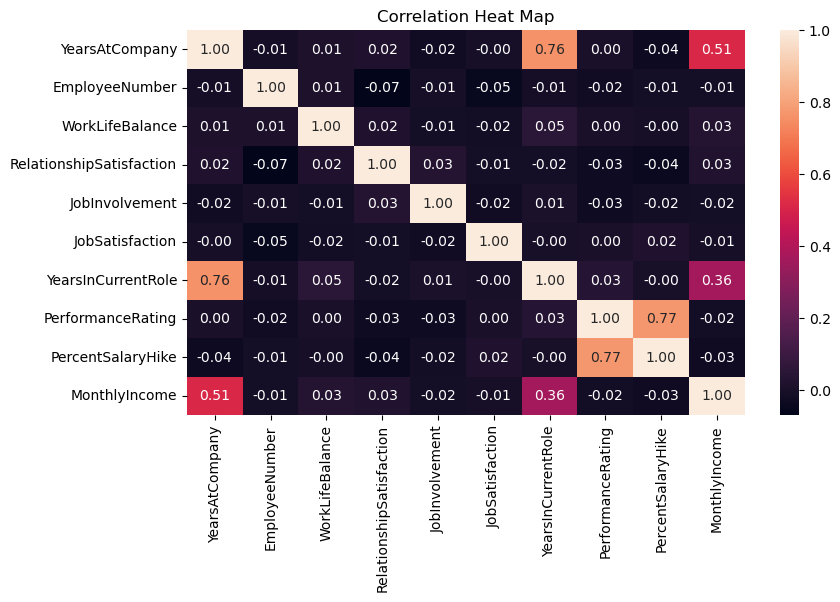

In [87]:
plt.figure(figsize=(9,5))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.title('Correlation Heat Map')
plt.show()

C:\Users\Bamy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


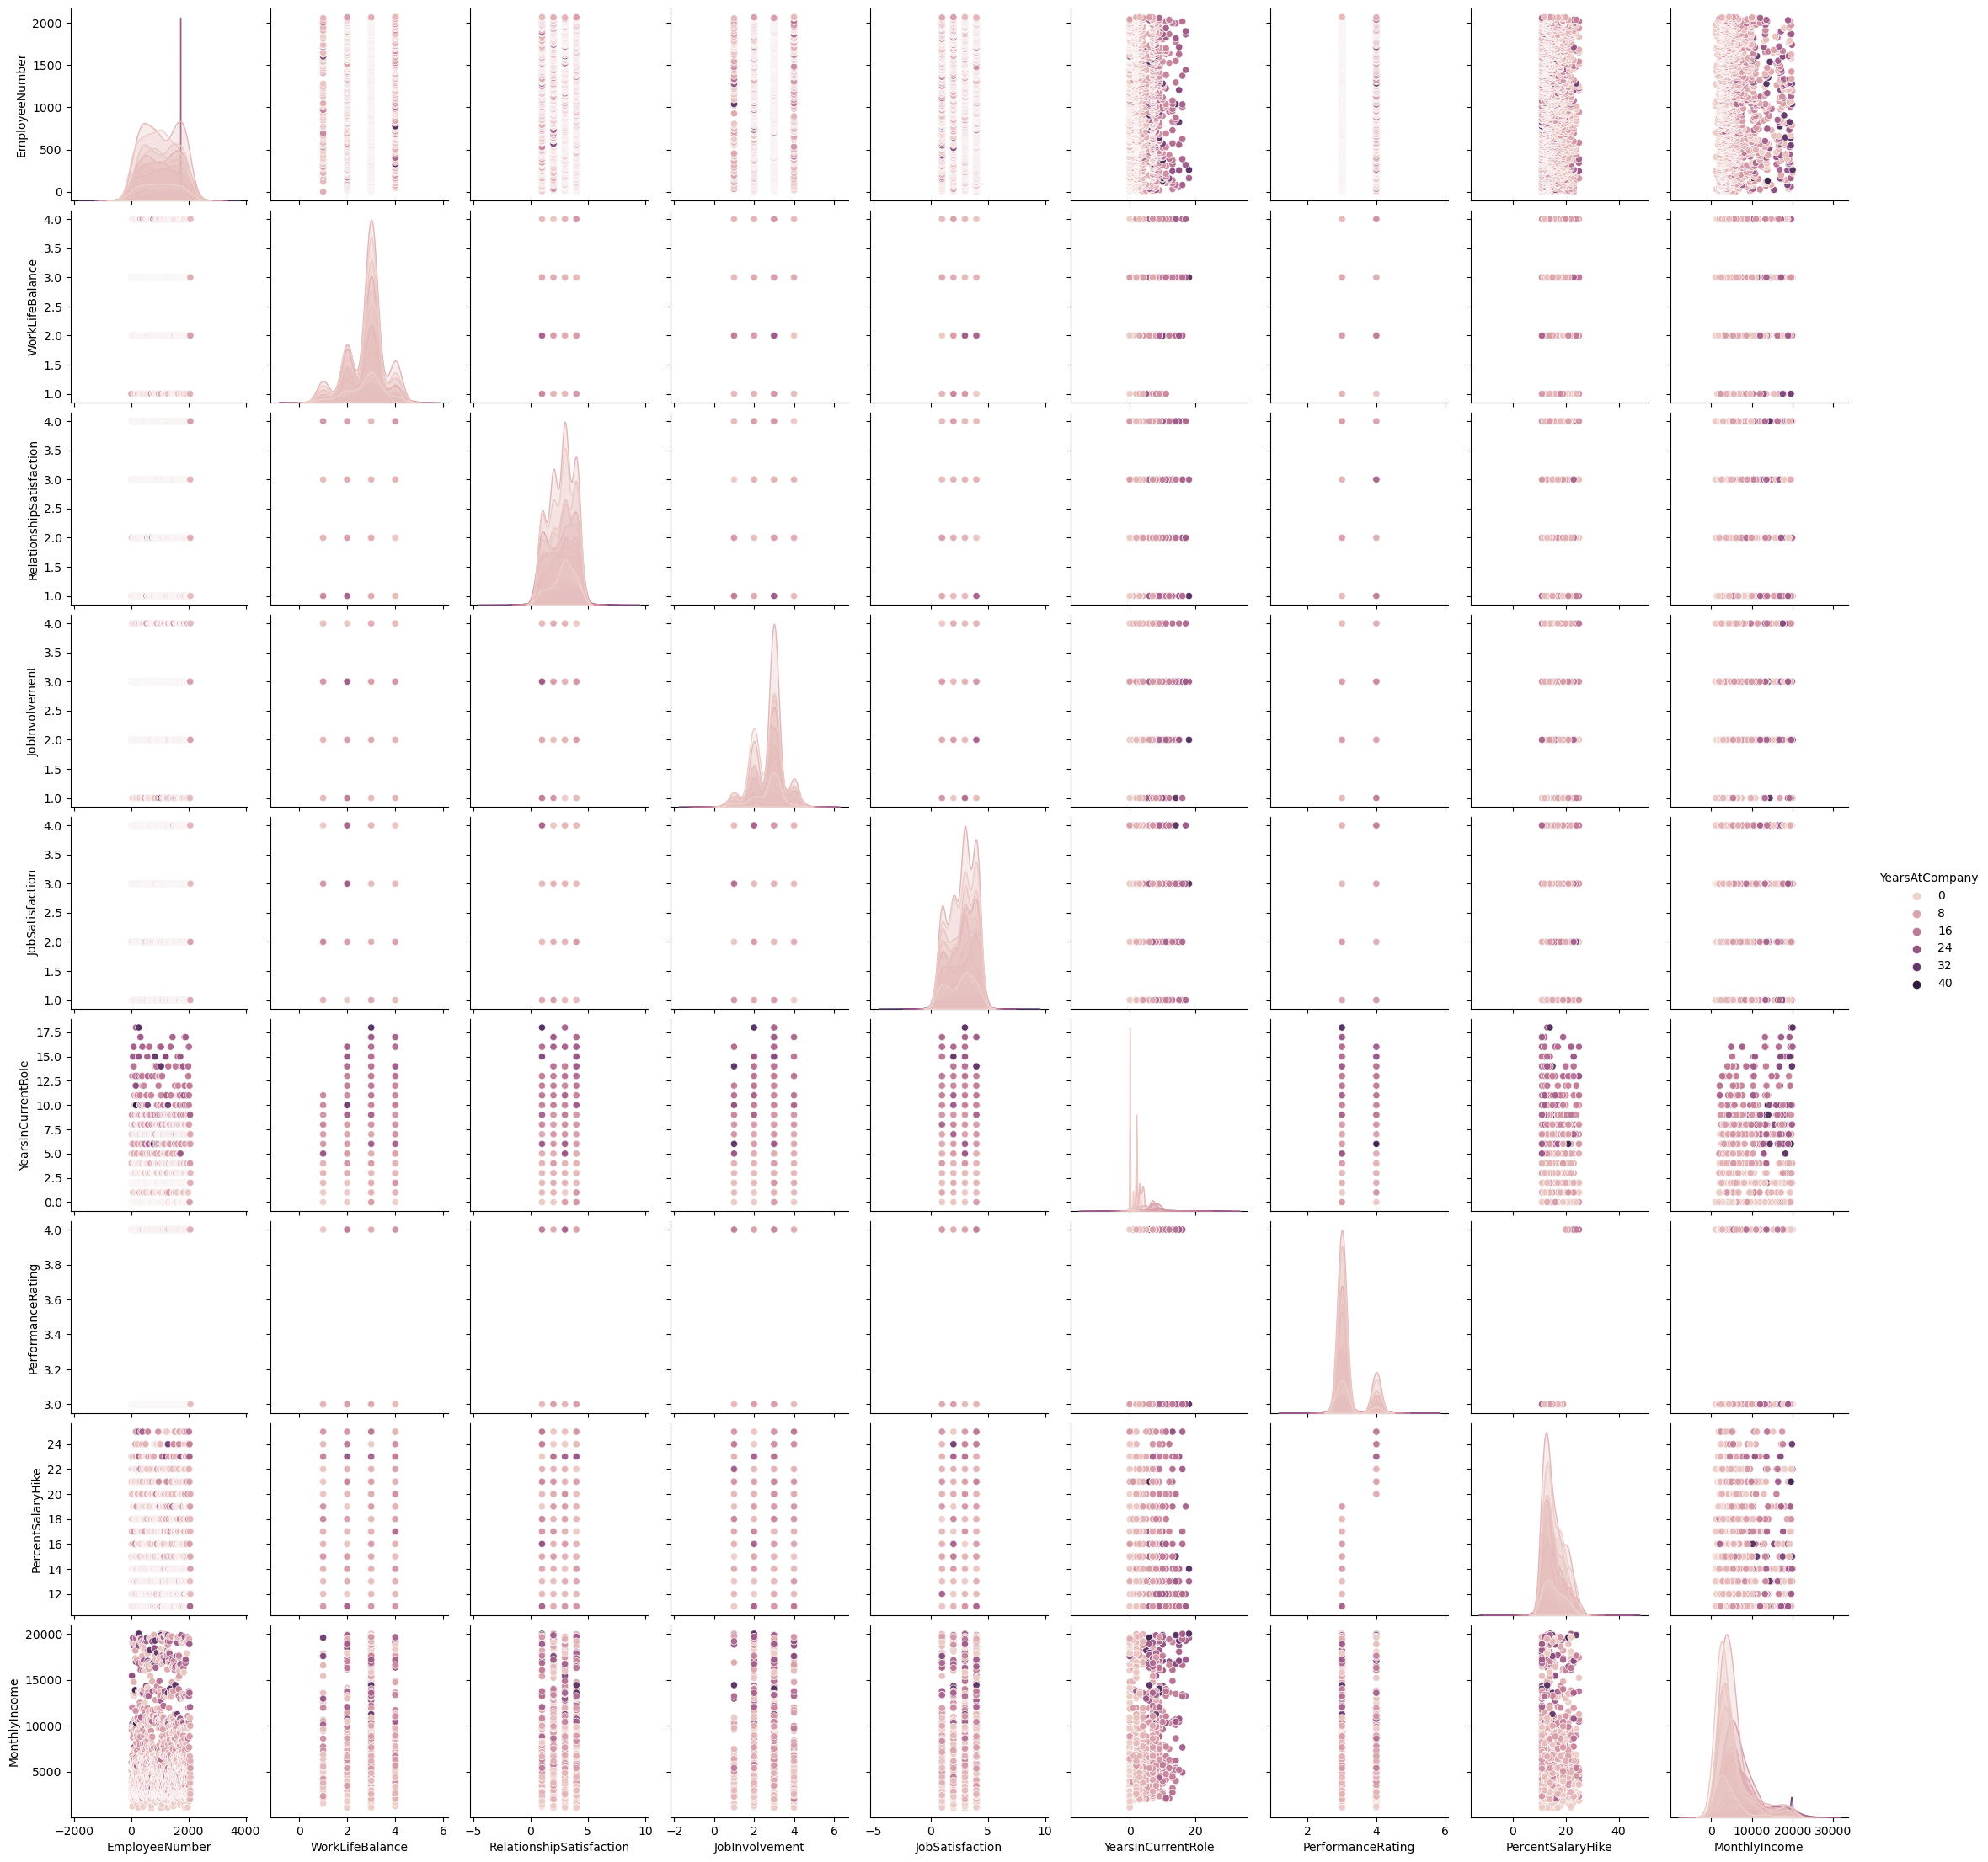

In [88]:
sns.pairplot(model_,hue= "YearsAtCompany")
plt.show()

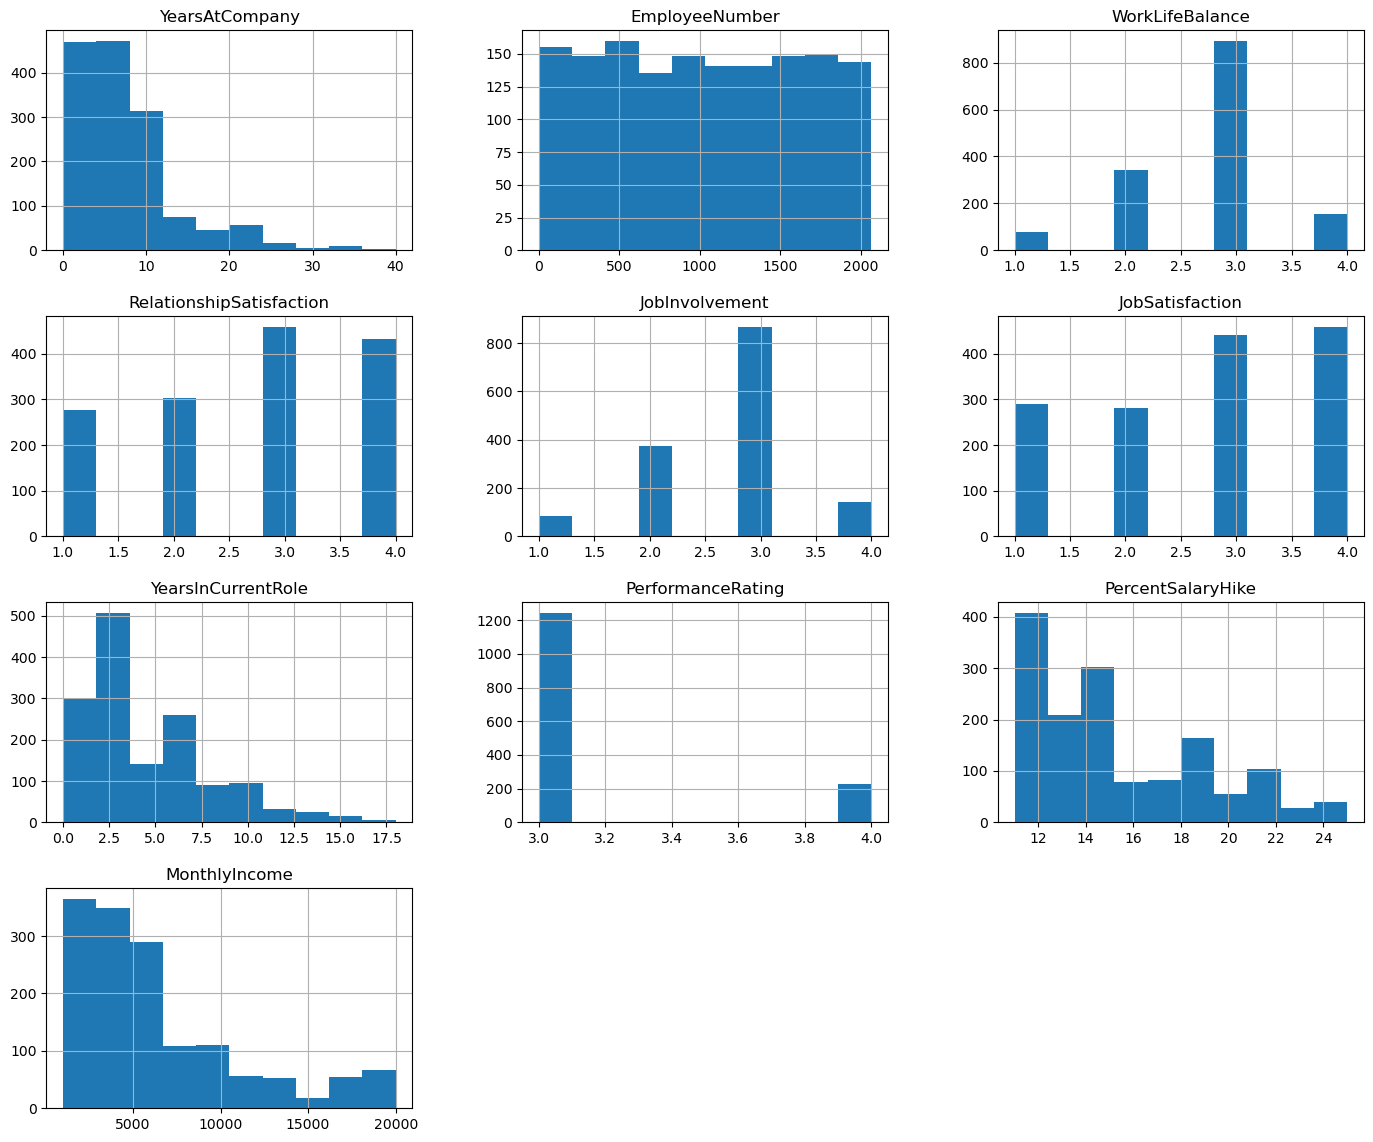

In [89]:
model_.hist(figsize=(17,14))
plt.show()

In [90]:
model_.columns

Index(['YearsAtCompany', 'EmployeeNumber', 'WorkLifeBalance',
       'RelationshipSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'YearsInCurrentRole', 'PerformanceRating', 'PercentSalaryHike',
       'MonthlyIncome'],
      dtype='object')

In [91]:
model_.describe()

,YearsAtCompany,EmployeeNumber,WorkLifeBalance,RelationshipSatisfaction,JobInvolvement,JobSatisfaction,YearsInCurrentRole,PerformanceRating,PercentSalaryHike,MonthlyIncome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,7.008163,1024.865306,2.761224,2.712245,2.729932,2.728571,4.229252,3.153741,15.209524,6502.931293
std,6.126525,602.024335,0.706476,1.081209,0.711561,1.102846,3.623137,0.360824,3.659938,4707.956783
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,11.000000,1009.000000
25%,3.000000,491.250000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,12.000000,2911.000000
50%,5.000000,1020.500000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,14.000000,4919.000000
75%,9.000000,1555.750000,3.000000,4.000000,3.000000,4.000000,7.000000,3.000000,18.000000,8379.000000
max,40.000000,2068.000000,4.000000,4.000000,4.000000,4.000000,18.000000,4.000000,25.000000,19999.000000


## Data wrangling for visualization

In [92]:
#allocating values to the numerical data
conditions = [
    (df['PerformanceRating'] == 3),
    (df['PerformanceRating'] >= 4)
]

In [93]:
values = ['Satisfactory', 'Top Performer']

In [94]:

df['Performance'] = np.select(conditions, values, default='Unknown')


In [95]:
df['WorkLifeBalance']

0       1
1       3
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    3
1468    2
1469    4
Name: WorkLifeBalance, Length: 1470, dtype: int64

In [117]:
def work_balance(x):
    if x<2:
        return 'Poor'
    elif x ==2:
        return 'Average'
    elif x==3:
        return 'Good'
    elif x>3:
        return 'Satisfactory'

In [118]:
df["Work_balance"] = df["WorkLifeBalance"].apply(work_balance)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Performance,Work_balance,Job_involvement,Job_Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,Satisfactory,Poor,Engaged,Very Satisfied
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,Top Performer,Good,Passive,Average
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,Satisfactory,Good,Passive,Satisfied
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,Satisfactory,Good,Engaged,Satisfied
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,Satisfactory,Good,Engaged,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,3,5,2,0,3,Satisfactory,Good,Actively Engaged,Very Satisfied
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,5,3,7,7,1,7,Satisfactory,Good,Passive,Not Satisfied
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,0,3,6,2,0,3,Top Performer,Good,Actively Engaged,Average
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,3,2,9,6,0,8,Satisfactory,Average,Passive,Average


In [115]:
def job_involvement(y):
    if y<2:
        return 'Redundant'
    elif y ==2:
        return 'Passive'
    elif y==3:
        return 'Engaged'
    elif y>3:
        return 'Actively Engaged'

In [116]:
df["Job_involvement"] = df["JobInvolvement"].apply(job_involvement)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Performance,Work_balance,Job_involvement,Job_Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,Satisfactory,Poor,Engaged,Very Satisfied
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,Top Performer,Good,Passive,Average
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,Satisfactory,Good,Passive,Satisfied
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,Satisfactory,Good,Engaged,Satisfied
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,Satisfactory,Good,Engaged,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,3,5,2,0,3,Satisfactory,Good,Actively Engaged,Very Satisfied
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,5,3,7,7,1,7,Satisfactory,Good,Passive,Not Satisfied
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,0,3,6,2,0,3,Top Performer,Good,Actively Engaged,Average
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,3,2,9,6,0,8,Satisfactory,Average,Passive,Average


In [119]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Performance', 'Work_balance',
       'Job_involvement', 'Job_Satisfaction'],
      dtype='object')

In [104]:
df['JobSatisfaction']

0       4
1       2
2       3
3       3
4       2
       ..
1465    4
1466    1
1467    2
1468    2
1469    3
Name: JobSatisfaction, Length: 1470, dtype: int64

In [113]:
def job_satisfaction(z):
    if z<2:
        return 'Not Satisfied'
    elif z==2:
        return 'Average'
    elif z==3:
        return 'Satisfied'
    elif z>3:
        return 'Very Satisfied'

In [114]:
df["Job_Satisfaction"] = df["JobSatisfaction"].apply(job_satisfaction)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Performance,Work_balance,Job_involvement,Job_Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,Satisfactory,Poor,Engaged,Very Satisfied
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,Top Performer,Good,Passive,Average
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,Satisfactory,Good,Passive,Satisfied
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,Satisfactory,Good,Engaged,Satisfied
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,Satisfactory,Good,Engaged,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,3,5,2,0,3,Satisfactory,Good,Engaged,Very Satisfied
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,5,3,7,7,1,7,Satisfactory,Good,Passive,Not Satisfied
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,0,3,6,2,0,3,Top Performer,Good,Engaged,Average
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,3,2,9,6,0,8,Satisfactory,Average,Passive,Average


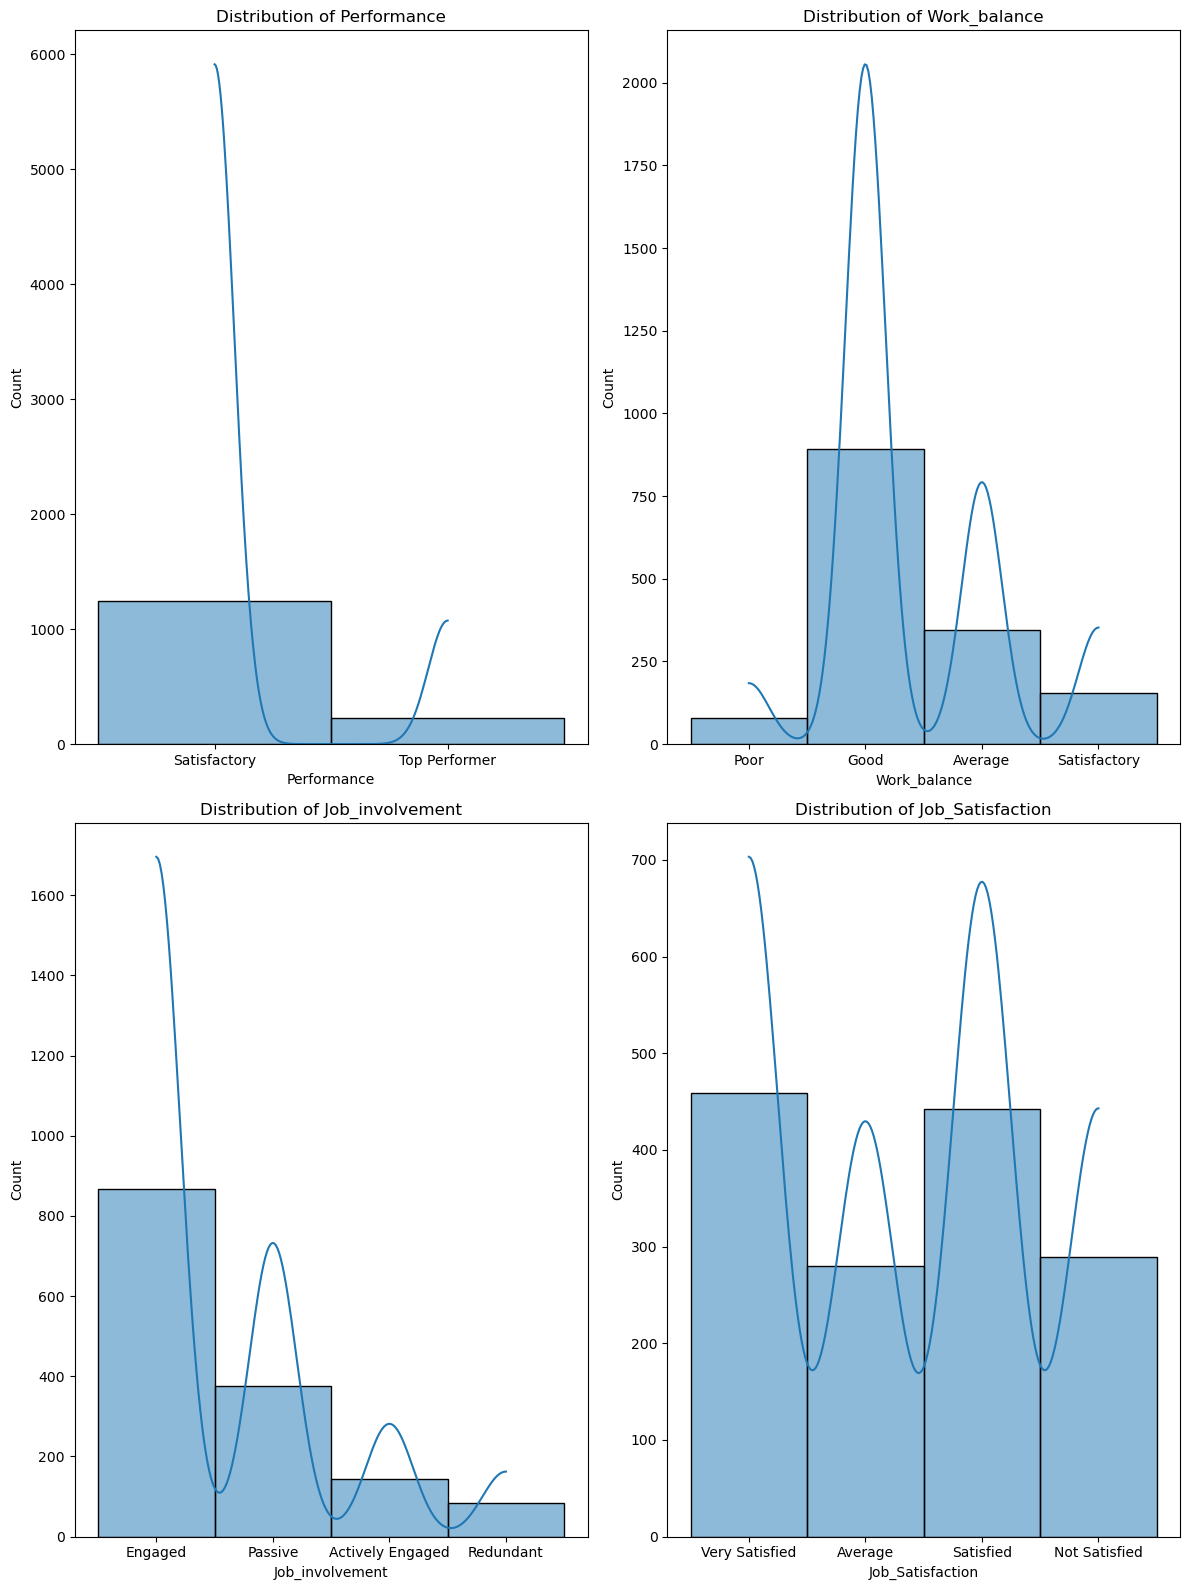

In [123]:
fig, axes = plt.subplots(2,2, figsize=(12,16))

axes = axes.flatten()

for i, column in enumerate(['Performance', 'Work_balance',
       'Job_involvement', 'Job_Satisfaction'], start=0):
    sns.histplot(data=df, x=column, multiple='stack', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()


## Conclusion and Recommendation

    Considering the above EDA process the following conclusion is being derived based on the dataset:

    .Promotions should be given to employees as and when due because there is a positive relationship between the years employees spends in their current role and high turnover rate. 

    .There is a positive relationship between monthly income of employees and staff turn over 
    
    .Management should carry out an employee audit investigating how redundant employees can be put to economic use for more results
    

   